In [19]:
import numpy as np
import matplotlib.pyplot as plt
from worldModels import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [20]:
def simulate_p_strategy(ntrials, pworld, pagent):
#     world = RandomWorld([pworld], [10000])
    world = PersistentWorld(np.array([[1-pworld, pworld]]), [10000])
    # Say we pick the choice randomly with prob 0.2
    choices = []
    rewards = []
    for i in range(ntrials):
        choice = np.random.rand() < pagent
        #print('choice = ', int(choice))
        choices.append(choice)
        reward = world.update(choice)
        rewards.append(reward)
        
    efficiency = np.sum(rewards) / ntrials
    return efficiency
    
        
        

In [21]:
# Let's plot the dependence on the p-strategy
N = 20
plst = np.linspace(0, 1, N)
results = np.zeros((N, N))
for idworld, pworld in enumerate(plst):
    for idagent, pagent in enumerate(plst):
        efficiency = simulate_p_strategy(1000, pworld=pworld, pagent=pagent)
        results[idworld][idagent] = efficiency
    

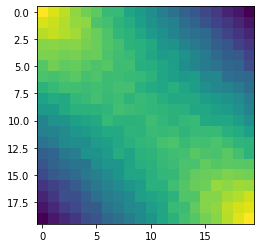

In [22]:
plt.imshow(results)

In [26]:
def simulate_agent(type, tau=0):
    nblocks = 200
    raw_rates = np.random.rand(nblocks)
    rates = np.vstack((1-raw_rates, raw_rates)).T
    ntrials = np.random.uniform(low=100, high=200, size=nblocks).astype('int')
    
#     world = RandomWorld(rates=rates, ntrials=ntrials)
    world = PersistentWorld(rates=rates, ntrials=ntrials)
    
    if type == 'LocalMatching':
        agent = LocalMatchingAgent(tau, eps=0.05)
    elif type == 'ConstantProb':
        agent = ConstantProbAgent(0.5)
    elif type == 'PiecewiseConstantProb':
        agent = PiecewiseConstantProbAgent(rates=raw_rates, ntrials=ntrials)
    elif type == 'Matching':
        agent = MatchingAgent(eps=0.05)

    exp = Experiment(agent, world)
    exp.run()  
    return agent.find_efficiency()


mean =  0.6125194503545407 std =  0.004792981381372984


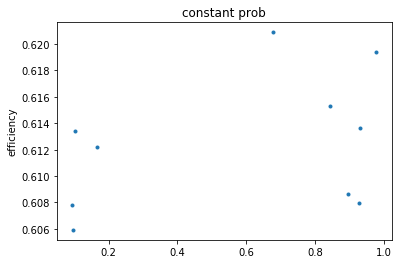

In [27]:
# Simulate a random agent for baseline performance
N = 10
results_random = []
for iter in range(N):
    prob = simulate_agent('ConstantProb', tau=1)
    results_random.append(prob)
        
plt.plot(np.random.rand(len(results_random)), results_random, '.')
plt.title('constant prob')
plt.ylabel('efficiency')
print('mean = ', np.mean(results_random), 'std = ', np.std(results_random))

mean =  0.7720761567882988 std =  0.007618233119075078


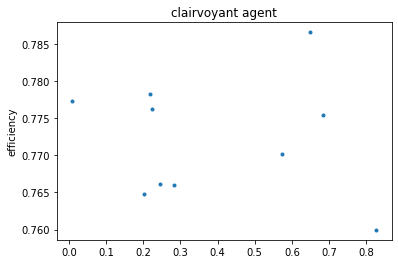

In [28]:
# Simulate a clairvoyant agent for baseline performance
N = 10
results_clairvoyant = []
for iter in range(N):
    prob = simulate_agent('PiecewiseConstantProb', tau=1)
    results_clairvoyant.append(prob)
        
plt.plot(np.random.rand(len(results_clairvoyant)), results_clairvoyant, '.')
plt.title('clairvoyant agent')
plt.ylabel('efficiency')

print('mean = ', np.mean(results_clairvoyant), 'std = ', np.std(results_clairvoyant))

In [29]:
# Test the Local Matching agent with various values of tau
taulst = np.arange(1, 15)
N = 10
results = np.zeros((len(taulst), N))
for idx, tau in enumerate(taulst):
    print(idx)
    for iter in range(N):
        prob = simulate_agent('LocalMatching', tau=tau)
        results[idx, iter] = prob
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13


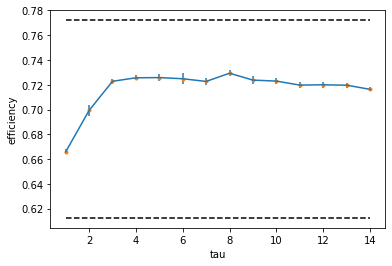

In [30]:
# Plot the results!
plt.errorbar(taulst, np.mean(results, axis=1), np.std(results, axis=1) / np.sqrt(N))
plt.plot(taulst, np.mean(results, axis=1), '.')
plt.ylabel('efficiency')
plt.xlabel('tau')

# Plot baseline performances
plt.hlines(np.mean(results_clairvoyant), min(taulst), max(taulst), linestyles='--')
plt.hlines(np.mean(results_random), min(taulst), max(taulst), linestyles='--')